In [1]:
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

- Alpaca api data:

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [205]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes (5 years)
start_date = pd.Timestamp("2017-11-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-11-01", tz="America/New_York").isoformat()

# ticker information
tickers = ["TSLA","SPY","XEL","AAPL","ESGU"]

# Get 5 year's worth of historical price data
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index = df_ticker.index.date

# sample data
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2017-11-17,171.04,171.39,169.6400,170.15,21900015,130140,170.393943,AAPL
2017-11-20,170.29,170.56,169.5600,169.98,16262789,95572,170.000606,AAPL
2017-11-21,170.78,173.70,170.7800,173.14,25131295,137407,172.945834,AAPL
2017-11-22,173.36,175.00,173.0500,174.96,25589080,130437,174.322524,AAPL
2017-11-24,175.10,175.50,174.6459,174.97,14446088,64847,175.096149,AAPL


In [206]:
# drop 'symbol' column
TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis = 1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis = 1)
XEL = df_ticker[df_ticker['symbol']=='XEL'].drop('symbol', axis = 1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis = 1)
ESGU = df_ticker[df_ticker['symbol']=='ESGU'].drop('symbol', axis = 1)

# concat ticker columns together
df_ticker = pd.concat([TSLA, SPY, XEL, AAPL, ESGU],axis=1, keys=['TSLA','SPY','XEL','AAPL','ESGU'])
df_ticker.tail()

TSLA                                                  \
               open      high     low   close    volume trade_count   
2022-10-26  219.400  230.6000  218.20  224.64  85275380      921830   
2022-10-27  229.770  233.8100  222.85  225.09  61644674      740945   
2022-10-28  225.400  228.8600  216.35  228.52  69040080      793069   
2022-10-31  226.195  229.8500  221.94  227.54  61560070      717792   
2022-11-01  234.050  237.3951  227.28  227.82  62689105      701489   

                           SPY                  ...       AAPL              \
                  vwap    open    high     low  ...     volume trade_count   
2022-10-26  226.572058  381.62  387.58  381.35  ...   88834489      693414   
2022-10-27  226.138713  383.07  385.00  379.33  ...  109198287      944054   
2022-10-28  224.185539  379.87  389.52  379.68  ...  164513407     1226015   
2022-10-31  226.621743  386.44  388.40  385.26  ...   97925458      726580   
2022-11-01  230.789246  390.14  390.39  383.29  ...   80379345      650595   

                         ESGU                                              \
                  vwap   open     high    low  close   volume trade_count   
2022-10-26  150.040815  84.73  86.1300  84.59  84.85  1521839       10038   
2022-10-27  145.311760  85.07  85.5600  84.26  84.43  1514914        8738   
2022-10-28  154.587167  84.27  86.4689  84.27  86.35   977578        6713   
2022-10-31  153.279315  85.68  86.2800  85.57  85.75  2183872        6309   
2022-11-01  150.980742  86.57  86.7037  85.18  85.42  2321629        5964   

                       
                 vwap  
2022-10-26  85.356688  
2022-10-27  84.797542  
2022-10-28  85.836537  
2022-10-31  85.899832  
2022-11-01  85.870217  

[5 rows x 35 columns]

In [207]:
# close price only
df_close = pd.DataFrame()
df_close["TSLA"] = df_ticker["TSLA"]["close"]
df_close["SPY"] = df_ticker["SPY"]["close"]
df_close["XEL"] = df_ticker["XEL"]["close"]
df_close["AAPL"] = df_ticker["AAPL"]["close"]
df_close["ESGU"] = df_ticker["ESGU"]["close"]
df_close


,TSLA,SPY,XEL,AAPL,ESGU
2017-11-17,315.05,257.87,50.89,170.15,56.509
2017-11-20,308.74,258.28,50.59,169.98,56.550
2017-11-21,317.81,259.93,50.61,173.14,56.900
2017-11-22,312.60,259.79,50.53,174.96,56.890
2017-11-24,315.55,260.37,50.71,174.97,57.000
...,...,...,...,...,...
2022-10-26,224.64,382.02,62.57,149.35,84.850
2022-10-27,225.09,379.98,63.25,144.80,84.430
2022-10-28,228.52,389.02,65.37,155.74,86.350
2022-10-31,227.54,386.21,65.11,153.34,85.750


In [208]:
# percent change and drop nulls
df_pct_change = df_close.pct_change().dropna()
df_pct_change

,TSLA,SPY,XEL,AAPL,ESGU
2017-11-20,-0.020029,0.001590,-0.005895,-0.000999,0.000726
2017-11-21,0.029377,0.006388,0.000395,0.018590,0.006189
2017-11-22,-0.016393,-0.000539,-0.001581,0.010512,-0.000176
2017-11-24,0.009437,0.002233,0.003562,0.000057,0.001934
2017-11-27,0.003993,-0.000538,0.002958,-0.005029,0.000288
...,...,...,...,...,...
2022-10-26,0.010004,-0.007534,0.002724,-0.019627,-0.007254
2022-10-27,0.002003,-0.005340,0.010868,-0.030465,-0.004950
2022-10-28,0.015238,0.023791,0.033518,0.075552,0.022741
2022-10-31,-0.004288,-0.007223,-0.003977,-0.015410,-0.006948


- FRED api data:

In [8]:
from fredapi import Fred

In [9]:
load_dotenv()
fred_api_key = os.getenv("fred_api_key")

Python-dotenv could not parse statement starting at line 1


In [10]:
# US10Y 
fred = Fred(fred_api_key)
data = fred.get_series('DGS10')
data

1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2022-11-04    4.17
2022-11-07    4.22
2022-11-08    4.14
2022-11-09    4.12
2022-11-10    3.82
Length: 15878, dtype: float64

In [220]:
# US10Y data from NOV 2017 - NOV 2022
data_ref =data.loc['2017-11-17':'2022-11-01'].dropna()
fred_df = pd.DataFrame(data_ref)

fred_df.index = fred_df.index.date

fred_df = fred_df / 100

fred_df

,0
2017-11-17,0.0235
2017-11-20,0.0237
2017-11-21,0.0236
2017-11-22,0.0232
2017-11-24,0.0234
...,...
2022-10-26,0.0404
2022-10-27,0.0396
2022-10-28,0.0402
2022-10-31,0.0410


- MC simulation:

In [12]:
from MCForecastTools import MCSimulation

In [23]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_1 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.2,.2,.2,.2,.2],
    num_simulation = 100,
    num_trading_days = 252*10)

In [24]:
MC_1.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [25]:
# run simulation
MC_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007454,1.010581,1.023793,0.994779,1.016667,1.001199,0.989620,1.003271,1.003695,1.023544,...,0.999604,0.981843,0.993878,0.992245,0.989435,0.978392,0.996693,1.013122,0.992014,0.993267
2,1.019435,1.009505,1.023892,0.971322,1.023439,1.014100,0.975088,1.007195,0.991957,1.034155,...,1.004058,1.005755,0.969450,0.972343,1.013403,0.968688,0.987678,1.004596,1.009487,0.992761
3,1.034924,1.014900,1.013847,0.981568,1.002605,0.998545,0.980636,1.019527,0.978611,1.021362,...,0.993426,1.004823,0.953537,0.966937,1.010763,0.969420,0.983629,1.013503,1.000821,0.957301
4,1.047155,0.984666,1.020525,0.954682,1.017199,1.012857,0.991858,1.023693,0.988925,1.033005,...,0.991624,1.003875,0.958236,0.961097,1.031315,0.964084,1.003800,0.990047,0.993216,0.959957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.487617,3.191471,2.093105,2.443932,1.189291,6.057607,2.781707,13.887769,5.462694,4.523667,...,1.335286,10.661484,3.539943,8.435938,2.633905,3.699333,3.184627,3.492842,4.934991,4.292251
2517,5.460689,3.134262,2.100199,2.415710,1.175144,5.948848,2.802870,13.917303,5.509719,4.608265,...,1.346412,10.563583,3.513398,8.585484,2.677399,3.695191,3.206913,3.446549,4.868010,4.397124
2518,5.356542,3.160088,2.146666,2.399600,1.182984,5.956847,2.806117,13.898588,5.544159,4.514341,...,1.329855,10.774357,3.485674,8.518001,2.638846,3.703857,3.149552,3.356908,4.874975,4.406938
2519,5.421717,3.198645,2.140595,2.385125,1.177243,5.937771,2.777039,13.841158,5.482211,4.556311,...,1.330886,10.827708,3.498563,8.463729,2.580316,3.631394,3.173689,3.404180,4.868234,4.375230


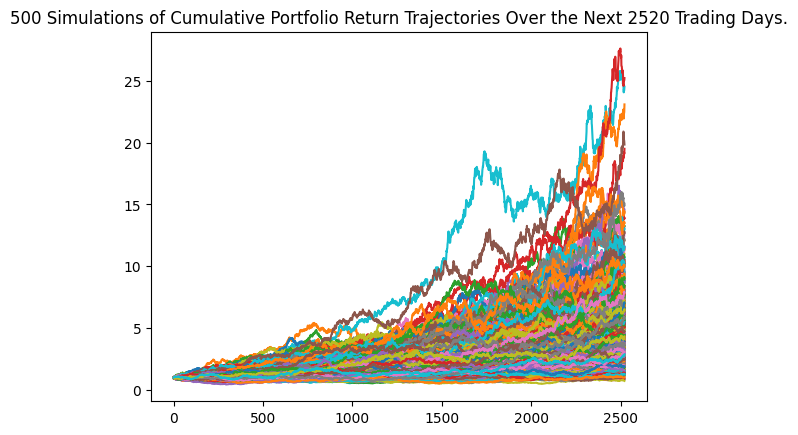

In [16]:
# plot simulation
line_plot = MC_1.plot_simulation()

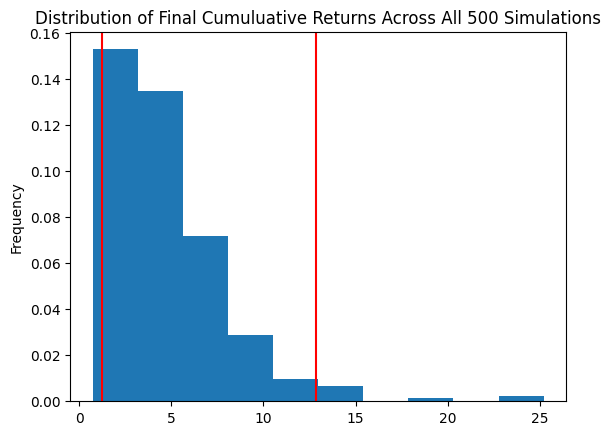

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = MC_1.plot_distribution()

In [18]:
# Summary statistics from the Monte Carlo simulation results
tbl_ = MC_1.summarize_cumulative_return()

print(tbl_)

count           500.000000
mean              4.838257
std               3.271745
min               0.742689
25%               2.617878
50%               4.145924
75%               6.189524
max              25.204580
95% CI Lower      1.272999
95% CI Upper     12.883372
Name: 2520, dtype: float64


C:\Users\Kyle Hagan\Team-3-Repo\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [47]:
# Initial investment
initial_investment = 100000

# Lower and upper `95%` confidence intervals
ci_lower = round(tbl_[8]*initial_investment,2)
ci_upper = round(tbl_[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $1039.3 and $25737953.38


In [48]:
MC_TSLA = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1,0,0,0,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [49]:
MC_TSLA.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [50]:
# run simulation
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008876,0.963636,1.008642,1.105388,1.021369,0.828143,1.028846,0.964554,1.030376,0.982809,...,0.967799,1.051382,1.022907,0.999458,0.991769,1.019428,1.027419,0.933471,1.013411,0.936838
2,1.089111,1.054136,1.035575,1.148278,1.066074,0.839722,1.011115,1.032134,1.118564,0.951970,...,0.977242,0.991492,1.001696,0.934368,0.938758,0.963919,1.030640,0.975890,0.965018,0.914846
3,1.110262,1.027017,1.060507,1.135801,1.082114,0.866290,1.038852,1.089149,1.025361,0.976471,...,1.009404,0.961393,0.945166,0.940636,0.869567,0.938131,1.079994,0.986840,0.969874,0.925428
4,1.118231,1.032007,1.055992,1.103474,1.044978,0.947594,1.011507,1.088787,1.058257,0.984270,...,0.982877,1.000758,0.890887,0.956553,0.790275,0.944353,1.051081,1.075504,0.981675,0.905580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.024582,0.972514,0.087950,0.031921,0.291433,268.591821,1.589625,2.835288,502.995081,13.222001,...,239.584080,1.077932,72.996042,5.201067,1.002692,9.948788,0.017833,0.025486,1.020719,0.359212
2517,0.023637,0.951150,0.093162,0.028427,0.296425,260.597707,1.635363,2.853323,466.376229,13.615971,...,261.632673,1.089107,68.443886,4.951035,1.050763,10.136701,0.018336,0.025749,1.016746,0.346577
2518,0.025198,0.914931,0.090222,0.029674,0.305027,261.324705,1.622851,3.072537,493.669077,14.394087,...,245.398099,0.967454,62.727502,4.871221,1.025925,9.395595,0.018519,0.026225,1.072260,0.336118
2519,0.025308,1.006122,0.092786,0.030071,0.330435,265.864694,1.709924,3.169536,522.819441,15.815936,...,255.110827,0.914648,61.255048,5.202328,0.999481,9.637273,0.018458,0.024543,1.109428,0.340922


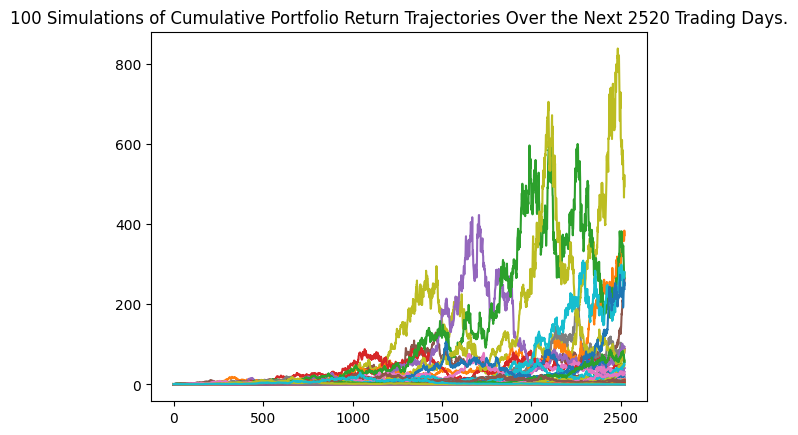

In [51]:
line_plot = MC_TSLA.plot_simulation()

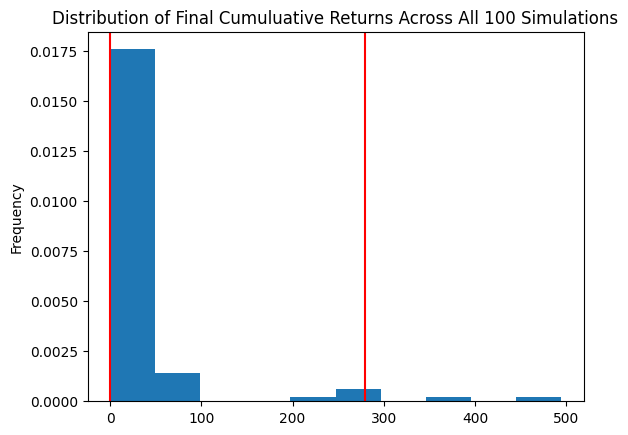

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_TSLA.plot_distribution()

In [53]:
tbl_TSLA = MC_TSLA.summarize_cumulative_return()

print(tbl_TSLA)

count           100.000000
mean             28.960956
std              79.501630
min               0.006861
25%               0.239764
50%               2.142876
75%              12.065675
max             494.321126
95% CI Lower      0.015323
95% CI Upper    279.496233
Name: 2520, dtype: float64


C:\Users\Kyle Hagan\Team-3-Repo\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [54]:
# Initial investment
initial_investment_TSLA = 100000

# Lower and upper `95%` confidence intervals
ci_lower_TSLA = round(tbl_TSLA[8]*initial_investment_TSLA,2)
ci_upper_TSLA = round(tbl_TSLA[9]*initial_investment_TSLA,2)

In [55]:
MC_SPY = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,1,0,0,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [56]:
MC_SPY.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [57]:
# run simulation
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994419,0.987359,1.029750,0.997828,0.988821,0.999256,0.988136,0.999631,1.012358,1.007935,...,1.007797,0.999204,1.003714,0.989734,1.014197,1.010004,0.983777,1.003118,0.989435,0.979786
2,1.000026,0.987307,1.038377,1.021428,0.981464,0.995055,0.981328,1.003448,1.031003,1.001448,...,0.996368,1.004549,0.996761,0.985809,1.019636,0.998535,0.990764,0.998244,0.981064,0.983769
3,1.007095,0.978941,1.056020,1.025352,0.969250,0.989040,0.974585,1.015730,1.025498,0.998080,...,0.995213,0.999172,1.002469,1.004694,1.023687,0.994378,1.009604,0.982980,0.988752,0.988775
4,1.008802,0.973852,1.040718,1.028008,0.974001,1.013618,0.961777,1.019072,1.034395,1.003124,...,1.018831,1.019623,1.003008,1.017528,1.023215,0.991371,1.005595,0.969023,1.001405,0.997693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.682842,1.436211,2.925290,1.884116,2.922001,4.950704,2.037688,0.873790,4.887299,3.602917,...,1.781949,4.178570,2.412983,1.242250,4.510094,4.617823,1.559062,4.328341,2.638135,3.366098
2517,2.706838,1.427048,2.927123,1.867472,2.955162,4.857836,2.008624,0.844387,4.976068,3.502291,...,1.791782,4.102685,2.405748,1.246174,4.525203,4.587120,1.563965,4.315597,2.707995,3.427023
2518,2.696191,1.443858,2.922839,1.862639,2.932830,4.834622,2.012751,0.845391,4.971388,3.484396,...,1.802774,4.199686,2.376417,1.259875,4.560740,4.571598,1.550664,4.340125,2.730399,3.542010
2519,2.727276,1.455168,2.863634,1.868320,2.923097,4.860395,1.993349,0.832570,4.913682,3.504307,...,1.794401,4.155786,2.356909,1.256283,4.577410,4.627143,1.515763,4.280828,2.722217,3.493639


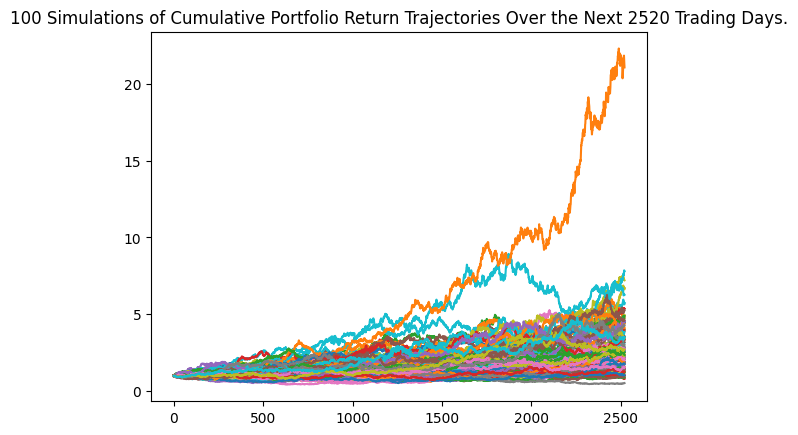

In [58]:
line_plot = MC_SPY.plot_simulation()

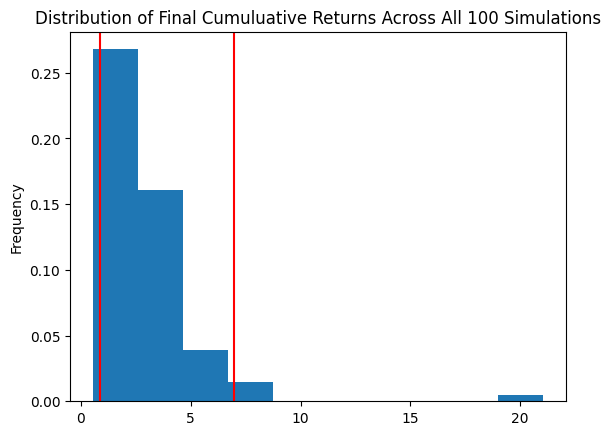

In [59]:
# Plot probability distribution and confidence intervals
dist_plot = MC_SPY.plot_distribution()

In [60]:
tbl_SPY = MC_SPY.summarize_cumulative_return()

print(tbl_SPY)

count           100.000000
mean              2.927520
std               2.390065
min               0.527214
25%               1.539424
50%               2.315838
75%               3.634571
max              21.059148
95% CI Lower      0.862809
95% CI Upper      6.967131
Name: 2520, dtype: float64


C:\Users\Kyle Hagan\Team-3-Repo\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [61]:
# Initial investment
initial_investment_SPY = 100000

# Lower and upper `95%` confidence intervals
ci_lower_SPY = round(tbl_SPY[8]*initial_investment_SPY,2)
ci_upper_SPY = round(tbl_SPY[9]*initial_investment_SPY,2)

In [62]:
MC_XEL = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,0,1,0,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [63]:
MC_XEL.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [64]:
# run simulation
MC_XEL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005412,0.987527,1.015412,0.997347,0.977624,1.017852,1.017739,1.044932,0.983196,1.003847,...,0.965357,0.981206,0.975123,1.000148,0.998738,1.012095,1.006293,0.973714,1.014778,0.984682
2,1.001575,1.011657,0.992639,1.006474,0.975627,0.998036,1.000556,1.026249,0.997110,1.002764,...,0.962105,0.975155,0.967083,0.987045,1.000922,1.037119,1.013763,0.982206,1.019303,0.995875
3,0.992793,1.019507,0.993534,1.030036,0.976462,1.007232,0.997465,1.001192,0.973221,1.014971,...,0.960160,0.971072,0.990421,1.015215,1.028277,1.024552,1.022842,0.969066,1.032652,1.008361
4,1.015235,1.018496,0.993403,1.044223,0.963186,1.006586,0.978329,0.988189,0.961980,1.027595,...,0.964284,0.972708,0.996616,1.008425,1.044731,1.035867,1.029119,0.955274,1.025786,1.001152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.244185,0.956459,3.857175,1.643138,1.508569,0.521678,1.956667,1.813743,1.106535,4.825095,...,2.121341,1.260306,2.217074,14.799892,0.231737,1.468063,0.802861,1.909544,0.862083,1.485868
2517,3.189246,0.971039,3.854935,1.642914,1.480782,0.524561,1.969122,1.818676,1.101941,4.826594,...,2.130367,1.242930,2.230008,14.719196,0.234116,1.458334,0.807940,1.921483,0.868042,1.509066
2518,3.142210,0.955928,3.777287,1.637268,1.487561,0.525476,1.983904,1.807586,1.103426,4.764471,...,2.115196,1.274246,2.248490,15.018625,0.238129,1.444154,0.792919,1.917957,0.846559,1.502743
2519,3.194223,0.952180,3.790985,1.677940,1.479000,0.531276,2.044155,1.809277,1.106699,4.725222,...,2.112531,1.268863,2.255601,15.313027,0.238665,1.429031,0.794942,1.935798,0.839002,1.511247


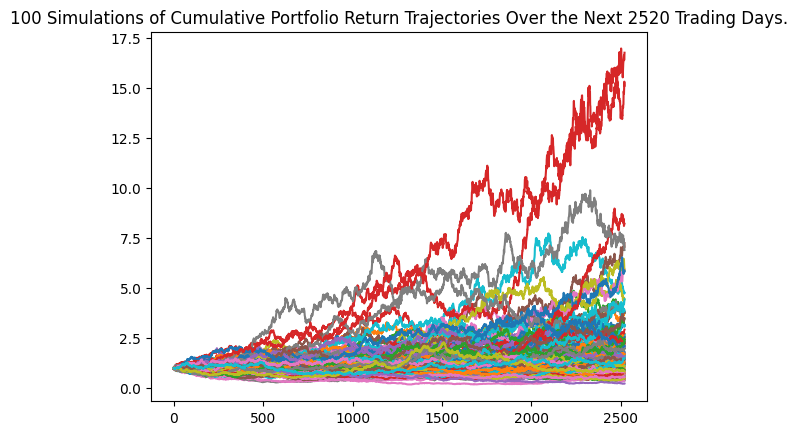

In [65]:
line_plot = MC_XEL.plot_simulation()

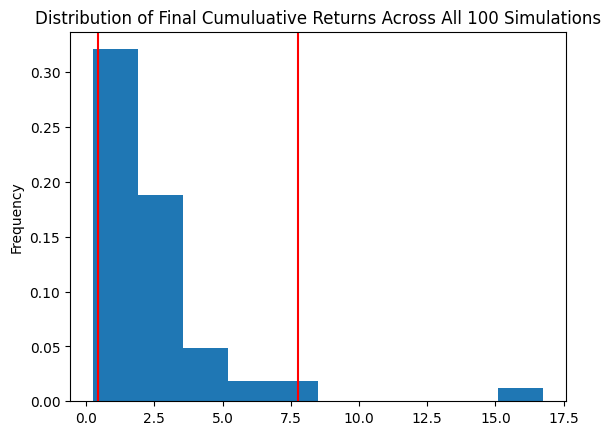

In [66]:
# Plot probability distribution and confidence intervals
dist_plot = MC_XEL.plot_distribution()

In [67]:
tbl_XEL = MC_XEL.summarize_cumulative_return()

print(tbl_XEL)

count           100.000000
mean              2.373282
std               2.492029
min               0.234748
25%               1.013254
50%               1.726445
75%               2.553808
max              16.758726
95% CI Lower      0.427101
95% CI Upper      7.757758
Name: 2520, dtype: float64


C:\Users\Kyle Hagan\Team-3-Repo\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [75]:
# Initial investment
initial_investment_XEL = 100000

# Lower and upper `95%` confidence intervals
ci_lower_XEL = round(tbl_XEL[8]*initial_investment_XEL,2)
ci_upper_XEL = round(tbl_XEL[9]*initial_investment_XEL,2)

In [76]:
MC_AAPL = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,0,0,1,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [77]:
MC_AAPL.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [78]:
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.041462,1.040064,0.958869,1.020719,1.025735,0.999979,0.972254,1.001236,1.017804,0.948227,...,1.002783,0.997367,0.987064,1.005164,0.976016,0.987284,0.996273,1.015482,0.969501,0.975807
2,1.027108,1.032448,0.958910,1.017829,1.016557,0.999127,0.953482,0.974309,1.067725,0.923915,...,0.997105,1.014155,0.965600,1.035662,1.013752,1.025538,0.972317,0.962691,0.944009,0.943129
3,0.988165,1.064818,0.940943,1.030021,1.076212,0.987597,0.988191,0.975588,1.078372,0.909911,...,1.028711,1.003861,0.939420,1.040812,1.082597,1.013771,0.985128,1.017935,0.917655,0.960945
4,0.959836,1.052600,0.993315,1.020157,1.079215,0.905735,0.985818,0.987240,1.013574,0.936927,...,1.029772,0.960859,0.904110,1.054253,1.086177,0.989702,0.974983,0.986067,0.925175,0.946000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.193611,2.668996,1.109632,3.261183,5.180379,3.447232,11.237762,4.396393,0.101424,1.668171,...,0.479464,1.854740,4.642143,0.443397,2.626340,8.694654,0.496380,0.962385,0.183596,0.078776
2517,0.193663,2.763547,1.053272,3.326911,5.272225,3.481010,10.978861,4.604338,0.099409,1.702887,...,0.461519,1.897734,4.574358,0.442778,2.617418,8.659971,0.514499,0.976885,0.186135,0.080034
2518,0.195297,2.627066,1.065677,3.350218,5.293181,3.447215,11.027832,4.647721,0.104231,1.723681,...,0.471300,1.936814,4.616977,0.433559,2.648143,8.545533,0.496085,1.031893,0.177151,0.078782
2519,0.190367,2.822765,1.055419,3.307217,5.215428,3.410733,11.064668,4.818983,0.102413,1.754057,...,0.476997,1.842036,4.526341,0.427693,2.732790,8.586294,0.504863,1.046742,0.173260,0.079525


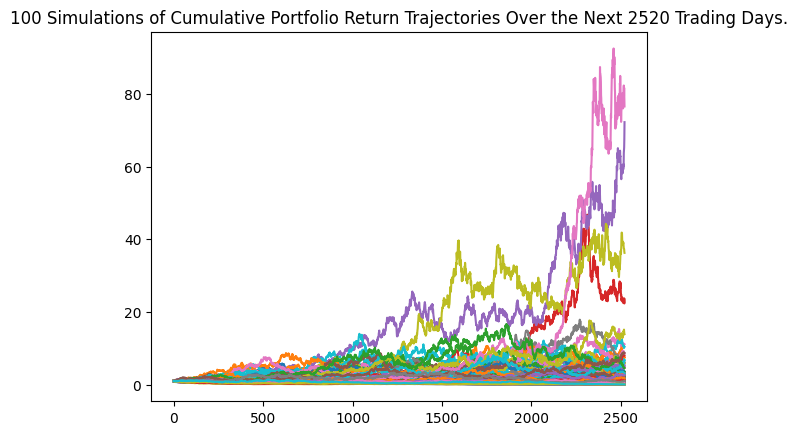

In [79]:
line_plot = MC_AAPL.plot_simulation()

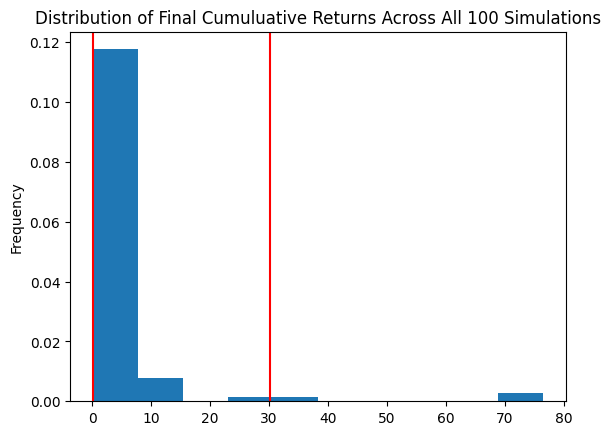

In [80]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AAPL.plot_distribution()

In [82]:
tbl_AAPL = MC_AAPL.summarize_cumulative_return()

print(tbl_AAPL)

count           100.000000
mean              4.365662
std              11.142328
min               0.063154
25%               0.448847
50%               1.359360
75%               3.417573
max              76.542599
95% CI Lower      0.072423
95% CI Upper     30.186162
Name: 2520, dtype: float64


C:\Users\Kyle Hagan\Team-3-Repo\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [83]:
# Initial investment
initial_investment_AAPL = 100000

# Lower and upper `95%` confidence intervals
ci_lower_AAPL = round(tbl_AAPL[8]*initial_investment_AAPL,2)
ci_upper_APPL = round(tbl_AAPL[9]*initial_investment_AAPL,2)

In [84]:
MC_ESGU = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,0,0,0,1],
    num_simulation = 100,
    num_trading_days = 252*10)

In [85]:
MC_ESGU.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [86]:
MC_ESGU.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980039,0.997551,0.999682,1.003158,1.002605,1.007168,1.007592,1.019975,0.996154,0.986008,...,0.980495,0.979318,0.997292,0.996743,1.007683,1.029259,0.986692,0.977826,0.982724,0.997963
2,0.994371,1.013089,0.997467,1.017301,0.987355,0.993248,1.010249,1.011169,0.999403,0.975886,...,0.957683,0.994515,0.987980,1.007372,1.002400,1.026200,0.981096,0.981233,0.969326,0.984098
3,0.997169,0.996520,0.997050,1.014091,0.989384,0.974901,1.013086,1.007897,1.012360,1.005001,...,0.953649,0.965083,1.021229,1.040816,1.001182,1.008467,0.998153,0.970964,0.972271,0.977222
4,1.014607,0.996209,0.998238,1.016289,0.992366,0.957667,1.011266,0.987534,1.020588,0.996434,...,0.964430,0.962367,1.033889,1.061068,0.992982,0.991055,0.991305,0.966881,0.970900,0.953815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.711610,10.025325,1.958097,2.705290,1.184856,5.077189,2.756184,4.718798,1.219878,2.361716,...,3.802067,6.425298,0.447433,0.956419,2.674422,2.853374,2.496378,1.213229,3.477790,7.105016
2517,4.844489,10.063504,1.948619,2.679987,1.203620,5.085392,2.810369,4.748598,1.216387,2.329758,...,3.851840,6.316191,0.437721,0.958089,2.686918,2.866685,2.501102,1.201645,3.461169,6.923052
2518,4.844154,10.071702,1.963099,2.691953,1.200734,5.098630,2.774481,4.765504,1.239272,2.346783,...,3.889326,6.328421,0.440034,0.953397,2.655713,2.906996,2.562176,1.194168,3.469692,6.965445
2519,4.867933,10.052071,1.982091,2.716683,1.206948,5.110633,2.744813,4.693763,1.211441,2.339003,...,3.858877,6.318634,0.443688,0.956644,2.724012,2.843595,2.495543,1.165576,3.455518,6.779324


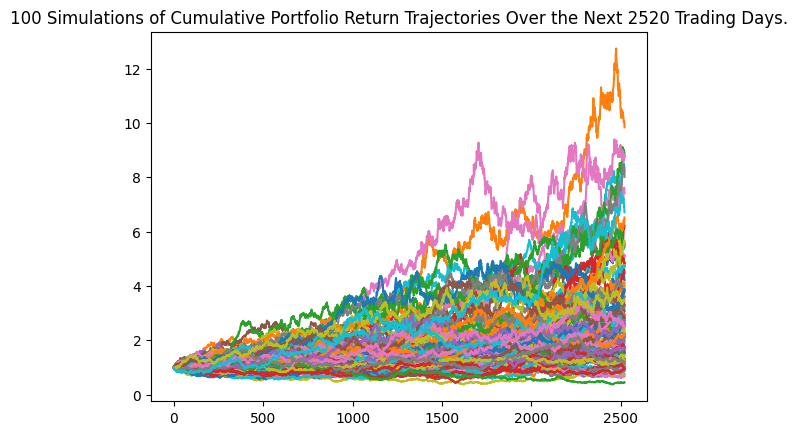

In [87]:
line_plot = MC_ESGU.plot_simulation()

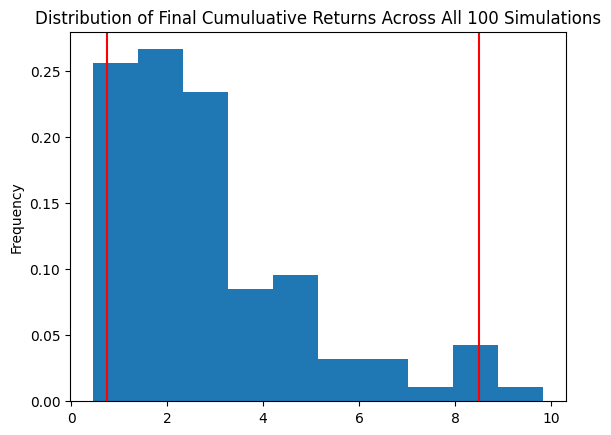

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ESGU.plot_distribution()

In [90]:
tbl_ESGU = MC_ESGU.summarize_cumulative_return()

print(tbl_ESGU)

count           100.000000
mean              2.897844
std               2.024639
min               0.449189
25%               1.457909
50%               2.426399
75%               3.647429
max               9.838815
95% CI Lower      0.741861
95% CI Upper      8.498473
Name: 2520, dtype: float64


C:\Users\Kyle Hagan\Team-3-Repo\MCForecastTools.py:168: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [91]:
# Initial investment
initial_investment_ESGU = 100000

# Lower and upper `95%` confidence intervals
ci_lower_ESGU = round(tbl_ESGU[8]*initial_investment_ESGU,2)
ci_upper_ESGU = round(tbl_ESGU[9]*initial_investment_ESGU,2)

In [125]:
annualized_mean_TSLA = tbl_TSLA[1]
mean_SPY = tbl_SPY[1]
mean_XEL = (tbl_XEL[1])**(1/10) - 1
mean_AAPL = tbl_AAPL[1]**(1/10) - 1
mean_ESGU = tbl_ESGU[1]**(1/10) - 1

In [136]:
mkt_growth = .06

In [137]:
dividend_XEL = 1.95

In [144]:
ddm_prediction_XEL = dividend_XEL / (mean_XEL - mkt_growth)
print(ddm_prediction_XEL)

64.4155245836379


In [140]:
dividend_AAPL = .92

In [142]:
ddm_prediction_AAPL = dividend_AAPL / (mean_AAPL - mkt_growth)
print(ddm_prediction_AAPL)

9.312613822031627


In [131]:
dividend_ESGU = 1.58

In [132]:
ddm_prediction_ESGU = dividend_ESGU / (mean_ESGU - mkt_growth)

17.124951105414315

In [210]:
SPY_CAPM = SPY.rename(columns = {'close' : 'SPY'})
SPY_CAPM = SPY_CAPM['SPY']
SPY_CAPM.head()

2017-11-17    257.87
2017-11-20    258.28
2017-11-21    259.93
2017-11-22    259.79
2017-11-24    260.37
Name: SPY, dtype: float64

In [211]:
spy_change = SPY_CAPM.pct_change().dropna()
spy_change.head()

2017-11-20    0.001590
2017-11-21    0.006388
2017-11-22   -0.000539
2017-11-24    0.002233
2017-11-27   -0.000538
Name: SPY, dtype: float64

In [212]:
AAPL_CAPM = AAPL.rename(columns = {'close' : 'AAPL'})
AAPL_CAPM = AAPL_CAPM['AAPL']
AAPL_CAPM.head()

2017-11-17    170.15
2017-11-20    169.98
2017-11-21    173.14
2017-11-22    174.96
2017-11-24    174.97
Name: AAPL, dtype: float64

In [213]:
AAPL_change = AAPL_CAPM.pct_change().dropna()
AAPL_change

2017-11-20   -0.000999
2017-11-21    0.018590
2017-11-22    0.010512
2017-11-24    0.000057
2017-11-27   -0.005029
                ...   
2022-10-26   -0.019627
2022-10-27   -0.030465
2022-10-28    0.075552
2022-10-31   -0.015410
2022-11-01   -0.017543
Name: AAPL, Length: 1246, dtype: float64

In [214]:
SPY_AAPL_CAPM = pd.concat([AAPL_change , spy_change] , axis = 'columns', join="inner")
SPY_AAPL_CAPM

,AAPL,SPY
2017-11-20,-0.000999,0.001590
2017-11-21,0.018590,0.006388
2017-11-22,0.010512,-0.000539
2017-11-24,0.000057,0.002233
2017-11-27,-0.005029,-0.000538
...,...,...
2022-10-26,-0.019627,-0.007534
2022-10-27,-0.030465,-0.005340
2022-10-28,0.075552,0.023791
2022-10-31,-0.015410,-0.007223


In [221]:
fred_spy_appl = pd.concat([fred_df , SPY_AAPL_CAPM] , axis = 'columns' , join = 'inner')
fred_spy_appl.head()

,0,AAPL,SPY
2017-11-20,0.0237,-0.000999,0.001590
2017-11-21,0.0236,0.018590,0.006388
2017-11-22,0.0232,0.010512,-0.000539
2017-11-24,0.0234,0.000057,0.002233
2017-11-27,0.0232,-0.005029,-0.000538


In [223]:
fred_spy_appl.to_csv('joined_fred_spy_aapl.csv')